In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
import scipy as sy
from scipy import signal
print("Ok")

Ok


In [2]:
data= pd.read_csv('RAW_Gyro_201701080900min_to_59min.csv', engine='python',header=0,index_col=0)#
print(data.iloc[0])
data=data.values
print(np.shape(data))

Pitch       0.104912
Roll        0.370688
Yaw      -172.083174
x_acc       0.000000
x_rvel     -0.041965
y_acc      -0.167969
y_rvel     -0.083929
z_acc      -9.726562
z_rvel     -0.237800
Name: 2017-01-08 09:00:00.031900, dtype: float64
(35921, 9)


In [3]:
N =len(data)    # サンプル数
dt =1/10   # サンプリング間隔

t = np.arange(0.0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N)#rad/s
fn=1/dt/2     #ナイキスト周波数

X=data[0:0+N,6]
print(np.shape(X))
print(X)
#X=np.array(list((chain.from_iterable(X))))

(35921,)
[-0.08392936 -0.08392936  0.09791759 ...  0.1538705   0.
  0.09791759]


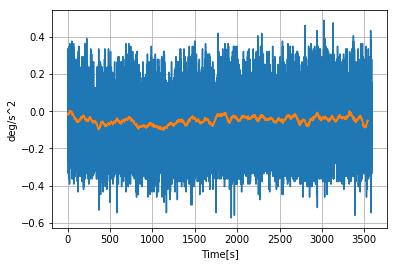

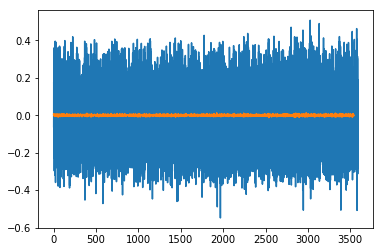

In [4]:
"""時系列データ"""
plt.figure()
plt.plot(t, X, label='X(t)')

conv1 = np.ones(500)/500 # 移動平均をとるための配列vを設定。今回は前後５つの値を用いて平均をとる。
X_mean = np.convolve(X, conv1, mode='valid') 

plt.plot(t[:len(X_mean)], X_mean, label='X(t)')
plt.xlabel("Time[s]")
plt.ylabel("deg/s^2")
#leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""フーリエ変換"""
F =np.fft.fft(X)
F=F/(N/2)
F[0]=F[0]/2
F2=F.copy()
"""周波数カットしてから逆フーリエ変換"""
F2[(freq<=0.03)]=0
F2[(freq>=1/(dt*2))]=0
X1=np.real(np.fft.ifft(F2))*N
conv1 = np.ones(500)/500 # 移動平均をとるための配列vを設定。今回は前後５つの値を用いて平均をとる。
X_mean = np.convolve(X1, conv1, mode='valid') 
#plt.ylim(-1,1)
plt.plot(t,X1)
plt.plot(t[:len(X_mean)],X_mean)

### 台形積分

(35921,)
(35822,)


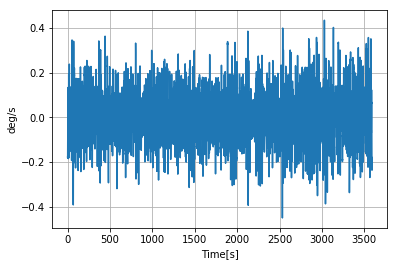

6556.62697101296


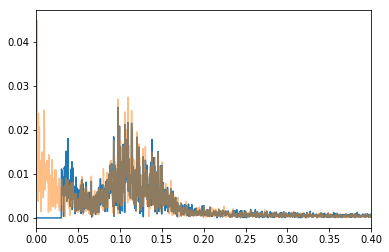

In [5]:
"""台形積分"""
V=np.zeros(len(X1))
for i in range(len(X1)-1):
    V[i+1]=(X1[i]+X1[i+1])*0.1/2+V[i]

conv1 = np.ones(100)/100 # 移動平均をとるための配列vを設定。今回は前後５つの値を用いて平均をとる。
V_mean = np.convolve(V, conv1, mode='valid')  # グラフを描く都合上'same'で。
print(np.shape(V))
print(np.shape(V_mean))

plt.figure()
plt.plot(t, V-np.mean(V), label='X(t)')
#plt.plot( t[:len(V_mean)] ,V_mean, label='X(t)')#t,
plt.xlabel("Time[s]")
plt.ylabel("deg/s")
#leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()
print(np.sum(np.abs(V)))

F =np.fft.fft(V)
F=F/(N/2)
F[0]=F[0]/2
"""周波数カットしてから逆フーリエ変換"""
plt.plot(freq[1:int(N/2)],np.abs(F)[1:int(N/2)])
plt.xlim(0,0.5)


Target= np.array(data[0:0+N,0])-np.mean( np.array(data[0:0+N,0]))
"""フーリエ変換"""
F =np.fft.fft(Target)
F=F/(N/2)
F[0]=F[0]/2
plt.plot(freq[1:int(N/2)],np.abs(F)[1:int(N/2)],alpha=0.5)
#plt.plot(t, np.array(data[0:0+N,0]), label='X(t)')
plt.xlim(0,0.4)
plt.show()